#### Wikipedia2Vec Installation and Familiarization

In [1]:
pip install wikipedia2vec

Note: you may need to restart the kernel to use updated packages.


In [2]:
from wikipedia2vec import Wikipedia2Vec

In [ ]:
import os

# check the current working directory
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

In [ ]:
import requests

# URL of the pretrained model - from wikipedia2vec site - https://wikipedia2vec.github.io/wikipedia2vec/pretrained/
url = 'http://wikipedia2vec.s3.amazonaws.com/models/en/2018-04-20/enwiki_20180420_300d.pkl.bz2'

# GET request to the URL
response = requests.get(url)

# saving the zipped content file
with open('enwiki_20180420_300d.pkl.bz2', 'wb') as file:
    file.write(response.content)

print("File downloaded successfully.")

File downloaded successfully.


In [4]:
# load pre-trained embeddings - en
wiki2vec = Wikipedia2Vec.load('enwiki_20180420_300d.pkl')

e:\Apps\Anaconda\envs\oulu_ac\lib\site-packages\joblib\numpy_pickle.py:230: UserWarning: The memmapped array [[-0.19859965 -0.06816383 -0.2850264  ...  0.07715177 -0.02776821
  -0.19740711]
 [ 0.03841671  0.01440218 -0.1375614  ... -0.18214722 -0.09775238
  -0.0422857 ]
 [-0.03071893 -0.20647831 -0.04814052 ... -0.00819415  0.27764547
   0.00785921]
 ...
 [-0.2674111  -0.11572331  0.37102547 ... -0.32288942 -0.05453032
  -0.3473579 ]
 [-0.40238228 -0.38080338  0.48129007 ... -0.0611211   0.07728622
  -0.29644254]
 [-0.48830998 -0.47115543  0.40146536 ... -0.12565771  0.08179317
  -0.51060534]] loaded from the file enwiki_20180420_300d.pkl is not byte aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
e:\Apps\Anaconda\envs\oulu_ac\lib\site-packages\joblib\nu

In [6]:
# xxample: Get the embedding for the word "chair"
word_embedding = wiki2vec.get_word('chair')

# xxample: Get the embedding for an entity "Chair (academic position)"
entity_embedding = wiki2vec.get_entity('Chair')

In [7]:
print(word_embedding)
print(entity_embedding)

<Word chair>
<Entity Chair>


In [8]:
# familiarizing with the Wikipedia2Vec functions available

word_embedding1 = wiki2vec.get_word('awarded')
word_embedding2 = wiki2vec.get_word('computer')
word_embedding3 = wiki2vec.get_word('science')

print(word_embedding1)
print(word_embedding2)
print(word_embedding3)

<Word awarded>
<Word computer>
<Word science>


In [9]:
word_vec_emb = wiki2vec.get_word_vector('chair')
word_vec_emb1 = wiki2vec.get_word_vector('awarded')
word_vec_emb2 = wiki2vec.get_word_vector('computer')
word_vec_emb3 = wiki2vec.get_word_vector('science')

In [121]:
# identify the shape of the vector from the pre-trained embedding model loaded
wiki2vec.get_word_vector('awarded').shape

(300,)

In [12]:
# calculating the most similar vector embedding words to a given word
wiki2vec.most_similar(wiki2vec.get_word('chair'), 5)

[ItemWithScore(item=<Word chair>, score=1.0),
 ItemWithScore(item=<Word chairs>, score=0.7502867579460144),
 ItemWithScore(item=<Word chairman>, score=0.6788321733474731),
 ItemWithScore(item=<Word chairperson>, score=0.66022127866745),
 ItemWithScore(item=<Word chairwoman>, score=0.6426982283592224)]

In [ ]:
# calculating the most similar vector embedding entity to a given word
wiki2vec.most_similar(wiki2vec.get_entity('Chair'), 5)

[ItemWithScore(item=<Entity Chair>, score=0.9999998807907104),
 ItemWithScore(item=<Entity Crate>, score=0.6209840774536133),
 ItemWithScore(item=<Word ladderback>, score=0.6175653338432312),
 ItemWithScore(item=<Entity Armrest>, score=0.6162238121032715),
 ItemWithScore(item=<Word chairs>, score=0.6137146353721619)]

In [13]:
import numpy as np
from scipy.spatial.distance import cosine

# function for cosine similarity calculation
def cosine_similarity(vec1, vec2):
        return 1 - cosine(vec1,vec2)

# get context word embeddings
context_embeddings = [wiki2vec.get_word_vector(word) for word in ["awarded", "computer", "science"]]

# calculate similarity between each context word and the target word
for context in context_embeddings:
    similarity_score = cosine_similarity(word_vec_emb, context)
    print("Similarity with 'chair':", similarity_score)


Similarity with 'chair': 0.2860488115662705
Similarity with 'chair': 0.24215533372218778
Similarity with 'chair': 0.25341256875288976


- Question 6) Instead of the Wikisim Framework (which is outdated and difficult to implement with running the servers and populating the graph databases), using Wikipedia2Vec framework.

#### Import libraries required for WSD


In [14]:
#import libraries
import nltk
from nltk.wsd import lesk
from nltk.corpus import wordnet as wn

In [ ]:
#install Wikipedia2Vec framework
pip install wikipedia2vec

In [ ]:
# download required knowledge bases for comparison
nltk.download('wordnet')

In [ ]:
# download senseval-2 dataset for evaluation
nltk.download("senseval")

In [ ]:
# import the framework
from wikipedia2vec import Wikipedia2Vec

# load pre-trained embeddings - en
wiki2vec = Wikipedia2Vec.load('enwiki_20180420_300d.pkl')

e:\Apps\Anaconda\envs\oulu_ac\lib\site-packages\joblib\numpy_pickle.py:230: UserWarning: The memmapped array [[-0.19859965 -0.06816383 -0.2850264  ...  0.07715177 -0.02776821
  -0.19740711]
 [ 0.03841671  0.01440218 -0.1375614  ... -0.18214722 -0.09775238
  -0.0422857 ]
 [-0.03071893 -0.20647831 -0.04814052 ... -0.00819415  0.27764547
   0.00785921]
 ...
 [-0.2674111  -0.11572331  0.37102547 ... -0.32288942 -0.05453032
  -0.3473579 ]
 [-0.40238228 -0.38080338  0.48129007 ... -0.0611211   0.07728622
  -0.29644254]
 [-0.48830998 -0.47115543  0.40146536 ... -0.12565771  0.08179317
  -0.51060534]] loaded from the file enwiki_20180420_300d.pkl is not byte aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
e:\Apps\Anaconda\envs\oulu_ac\lib\site-packages\joblib\nu

In [16]:
# task 1 : run simple similarity between word pairs

# define example words
word1 = "look"
word2 = "watch"

# function to check whether for a given word embedding exists otherwise return None
def check_embedding_exist(word):
    word_emb = wiki2vec.get_word(word)
    if word_emb != None:
        print(f"Word '{word}' embedding exist: {word_emb}")
    else:
        print(f"Word '{word}' not found in Wikipedia2Vec embeddings, using lowercase words might solve the issue")

# check word embedding existence using loaded embedding database in wiki2vec
check_embedding_exist(word1)
check_embedding_exist(word2)

Word 'look' embedding exist: <Word look>
Word 'watch' embedding exist: <Word watch>


In [119]:
# import cosine
from scipy.spatial.distance import cosine

# define example words
word1 = "chair"
word2 = "chairperson"

# Function for cosine similarity calculation
def cosine_similarity(vec1, vec2):
    return 1 - cosine(vec1,vec2)

# function to extract the embeddings for a given word if exists otherwise return None
def get_embedding(word):
    try:
        return wiki2vec.get_word_vector(word)
    except KeyError:
        print(f"'{word}' not found in Wikipedia2Vec embeddings")
        return None

# get the embedding vectors of each for cosine similarity
word1_vec_embedding = wiki2vec.get_word_vector(word1)
word2_vec_embedding = wiki2vec.get_word_vector(word2)

similarity_score = cosine_similarity(word1_vec_embedding, word2_vec_embedding)
print(f"similarity between '{word1}' and '{word2}':", similarity_score)

similarity between 'chair' and 'chairperson': 0.660221283729133


In [18]:
# provided sentence S
sentence = "I was awarded a chair in computer science"
target_word = "chair"

In [19]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag

words = word_tokenize(sentence)

# get pos tags associated to all words in the sentence
pos_words = pos_tag(words)
print(pos_words)

[('I', 'PRP'), ('was', 'VBD'), ('awarded', 'VBN'), ('a', 'DT'), ('chair', 'NN'), ('in', 'IN'), ('computer', 'NN'), ('science', 'NN')]


In [20]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag

def preProcess(sentence):
    # tokenize and extract stop word list in English
    Stopwords = list(set(nltk.corpus.stopwords.words('english')))
    words = word_tokenize(sentence)

    # get pos tags associated to all words in the sentence
    pos_words = pos_tag(words)
    
    # filtering
    words = [word.lower() for (word,pos) in pos_words if word.isalpha() and word not in Stopwords and pos not in ('PRP') and word != target_word] 
    return words

context_words = preProcess(sentence.lower())
print(context_words)

['awarded', 'computer', 'science']


In [21]:
from nltk.wsd import lesk

# applying Lesk algorithm
lesk_sense = lesk(sentence.split(), target_word)

# display the synset name and definition for most overlapping sense
print("Lesk selected sense:", lesk_sense)
print("Definition:", lesk_sense.definition())

Lesk selected sense: Synset('chair.v.01')
Definition: act or preside as chair, as of an academic department in a university


In [ ]:
# using wikipedia2Vec extract the embeddings for the target word and context words

target_embedding = get_embedding(target_word)
context_embeddings = {word: get_embedding(word) for word in context_words if get_embedding(word) is not None}

print("Target embedding:", target_embedding)
print("Context embeddings:", context_embeddings)

In [23]:
# Calculate similarity scores
similarity_scores = {}
for word, embed_vec in context_embeddings.items():
    if target_embedding is not None and embed_vec is not None:
        similarity_scores[word] = cosine_similarity(target_embedding, embed_vec)

print(f"similarity scores of word '{target_word}' with each context word'", similarity_scores)

similarity scores of word 'chair' with each context word' {'awarded': 0.2860488115662705, 'computer': 0.24215533372218778, 'science': 0.25341256875288976}


In [287]:
# In order to compare the similarity score with other senses of the word 'chair', need to get them using wordsense knowledge bases or wikipedia entries.

In [ ]:
from nltk.corpus import senseval

# understanding Senseeval-2 dataset structure

# instance for the word "interest"
instances = senseval.instances("interest.pos")
example_instance = instances[9]

# displaying structure of example instance
print("Target Word:", example_instance.word)
print("Context:", [(w, pos) for (w, pos) in example_instance.context])
print("Sense Label(s):", example_instance.senses)


Target Word: interest-n
Context: [('that', 'DT'), ('stake', 'NN'), (',', ','), ('together', 'RB'), ('with', 'IN'), ('its', 'PRP$'), ('convertible', 'JJ'), ('preferred', 'JJ'), ('stock', 'NN'), ('holdings', 'NNS'), (',', ','), ('gives', 'VBZ'), ('faulding', 'VBG'), ('the', 'DT'), ('right', 'NN'), ('to', 'TO'), ('increase', 'VB'), ('its', 'PRP$'), ('interest', 'NN'), ('to', 'TO'), ('70', 'CD'), ('%', 'NN'), ('of', 'IN'), ('moleculon', 'NN'), ("'s", 'POS'), ('voting', 'NN'), ('stock', 'NN'), ('.', '.')]
Sense Label(s): ('interest_5',)


- Question 7) Comparison of similarity performance of Wikipedia2Vec, word2vec, GloVe and FastText based on benchmark datasets (MC, RG and WS353)

In [ ]:
pip install pandas scipy gensim seaborn matplotlib


In [24]:
import pandas as pd

# load datasets
mc_df = pd.read_csv('datasets/mc.csv', sep=';')
rg_df = pd.read_csv('datasets/rg.csv', sep=';')
ws353_df = pd.read_csv('datasets/wordsim.csv', sep=';')

# display the dataset structures
print("MC Dataset:\n", mc_df.head())
print("\nRG Dataset:\n", rg_df.head())
print("\nWS353 Dataset:\n", ws353_df.head())


MC Dataset:
         word1   word2  score
0  automobile     car   3.92
1         gem   jewel   3.84
2     journey  voyage   3.84
3         boy     lad   3.76
4       coast   shore   3.70

RG Dataset:
        word1    word2  score
0       cord    smile   0.02
1    rooster   voyage   0.04
2       noon   string   0.04
3      fruit  furnace   0.05
4  autograph    shore   0.06

WS353 Dataset:
       word1     word2  score
0      love       sex   6.77
1     tiger       cat   7.35
2     tiger     tiger  10.00
3      book     paper   7.46
4  computer  keyboard   7.62


In [25]:
import gensim.downloader

gensim.downloader.info(name_only=True)

{'corpora': ['semeval-2016-2017-task3-subtaskBC',
  'semeval-2016-2017-task3-subtaskA-unannotated',
  'patent-2017',
  'quora-duplicate-questions',
  'wiki-english-20171001',
  'text8',
  'fake-news',
  '20-newsgroups',
  '__testing_matrix-synopsis',
  '__testing_multipart-matrix-synopsis'],
 'models': ['fasttext-wiki-news-subwords-300',
  'conceptnet-numberbatch-17-06-300',
  'word2vec-ruscorpora-300',
  'word2vec-google-news-300',
  'glove-wiki-gigaword-50',
  'glove-wiki-gigaword-100',
  'glove-wiki-gigaword-200',
  'glove-wiki-gigaword-300',
  'glove-twitter-25',
  'glove-twitter-50',
  'glove-twitter-100',
  'glove-twitter-200',
  '__testing_word2vec-matrix-synopsis']}

In [ ]:
# download the required models pre-trained embedding files
word2vec_model = gensim.downloader.load('word2vec-google-news-300')
fasttext_model = gensim.downloader.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
# download the required models pre-trained embedding files
glove_model = gensim.downloader.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [30]:
from scipy.spatial.distance import cosine

# function to get Wikipedia2Vec vector embeddings for cosine similarity
def get_wikipedia2vec_similarity_score(word1, word2, model):
    try:
        vec1 = model.get_word_vector(word1)
        vec2 = model.get_word_vector(word2)
        return 1 - cosine(vec1, vec2)
    except KeyError:
        return None

# function to get other models(word2vec, glove, fassttext) vector embeddings for cosine similarity
def get_other_model_similarity(word1, word2, embedding_model):
    try:
        vec1 = embedding_model[word1]
        vec2 = embedding_model[word2]
        return 1 - cosine(vec1, vec2)
    except KeyError:
        return 0


In [31]:
# function to calculate cosine similarities
def calculate_similarities(df):
    
    # initialize lists to store the similarity scores
    wikipedia2vec_scores = []
    word2vec_scores = []
    glove_scores = []
    fasttext_scores = []
    
    # loop over each word pairs in a dataset to find cosine similarity of each of them
    for _, row in df.iterrows():
        word1 = row['word1']
        word2 = row['word2']
        
        # using Wikipedia2Vec Embeddings
        wiki_score = get_wikipedia2vec_similarity_score(word1.lower(), word2.lower(), wiki2vec)
        wikipedia2vec_scores.append(wiki_score)
        
        # using word2vec Embeddings
        w2v_score = get_other_model_similarity(word1, word2, word2vec_model)
        word2vec_scores.append(w2v_score)

        # using GloVe Embeddings
        glove_score = get_other_model_similarity(word1, word2, glove_model)
        glove_scores.append(glove_score)

        # using FastText Embeddings
        fasttext_score = get_other_model_similarity(word1, word2, fasttext_model)
        fasttext_scores.append(fasttext_score)

    # return the populated score values from each model
    return wikipedia2vec_scores, word2vec_scores, glove_scores, fasttext_scores

# calculate similarities for each dataset
mc_results = calculate_similarities(mc_df)
rg_results = calculate_similarities(rg_df)
ws353_results = calculate_similarities(ws353_df)


In [ ]:
#print the outputs
print(mc_results)
print(rg_results)
print(ws353_results)

In [32]:
# since the human judgement scores are in different scales need to normalize the calculated cosine similarity score scale (0 - 1) --> to relevant dataset human judgment scale for comparison with correlation
# For MC and RG - score scale (0 - 4)
# For WS353 - score scale (0-10)

# normalize score based on min and max scores in each scale
def normalize_scores(scores, new_min, new_max):
    min_score = min(scores)
    max_score = max(scores)
    normalized_scores = [new_min + (score - min_score) * (new_max - new_min) / (max_score - min_score) for score in scores]
    return normalized_scores

# apply normalization to each dataset with the specific scales
mc_results_normalized = tuple([normalize_scores(sim_list, 0, 4) for sim_list in mc_results])
rg_results_normalized = tuple([normalize_scores(sim_list, 0, 4) for sim_list in rg_results])
ws353_results_normalized = tuple([normalize_scores(sim_list, 0, 10) for sim_list in ws353_results])

# output the results
#print("MC Results Normalized:", mc_results_normalized)
#print("RG Results Normalized:", rg_results_normalized)
#print("WS353 Results Normalized:", ws353_results_normalized)


In [46]:
from scipy.stats import pearsonr

# correlation computation function
def compute_correlation(human_scores, model_scores):
    
    filtered_scores = [(human, model) for human, model in zip(human_scores, model_scores)]
    if len(filtered_scores) > 0:
        human, model = zip(*filtered_scores)
        return pearsonr(human, model)[0]
    return None

# compute correlations store as a dictionary output for each dataset and model
corr_results = {}

# define the dataset structure
datasets = {'MC': mc_df, 'RG': rg_df, 'WS353': ws353_df}

# loop through each dataset and calculate correlation scores
for dataset_name, df in datasets.items():

    # call normalize functions 
    if dataset_name == 'MC':
        sim_scores = mc_results_normalized
    elif dataset_name == 'RG':
         sim_scores = rg_results_normalized
    else:
        sim_scores = ws353_results_normalized

    # calculate pearson correlation values
    corr_results[dataset_name] = {
        'Wikipedia2Vec': compute_correlation(df['score'], sim_scores[0]),
        'word2vec': compute_correlation(df['score'], sim_scores[1]),
        'GloVe': compute_correlation(df['score'], sim_scores[2]),    
        'FastText': compute_correlation(df['score'], sim_scores[3])
    }

print(corr_results)

{'MC': {'Wikipedia2Vec': 0.8172162439091432, 'word2vec': 0.792851878067315, 'GloVe': 0.7405472324944988, 'FastText': 0.8527446370208753}, 'RG': {'Wikipedia2Vec': 0.7916370701266602, 'word2vec': 0.7720616049320058, 'GloVe': 0.7516215829234909, 'FastText': 0.8662923573916699}, 'WS353': {'Wikipedia2Vec': 0.6590746153291709, 'word2vec': 0.6525349606146122, 'GloVe': 0.5209313895806791, 'FastText': 0.6980656892930556}}


In [47]:
# convert to a DataFrame for tabulating the results
corr_df = pd.DataFrame(corr_results).T

# output
print(corr_df)

       Wikipedia2Vec  word2vec     GloVe  FastText
MC          0.817216  0.792852  0.740547  0.852745
RG          0.791637  0.772062  0.751622  0.866292
WS353       0.659075  0.652535  0.520931  0.698066


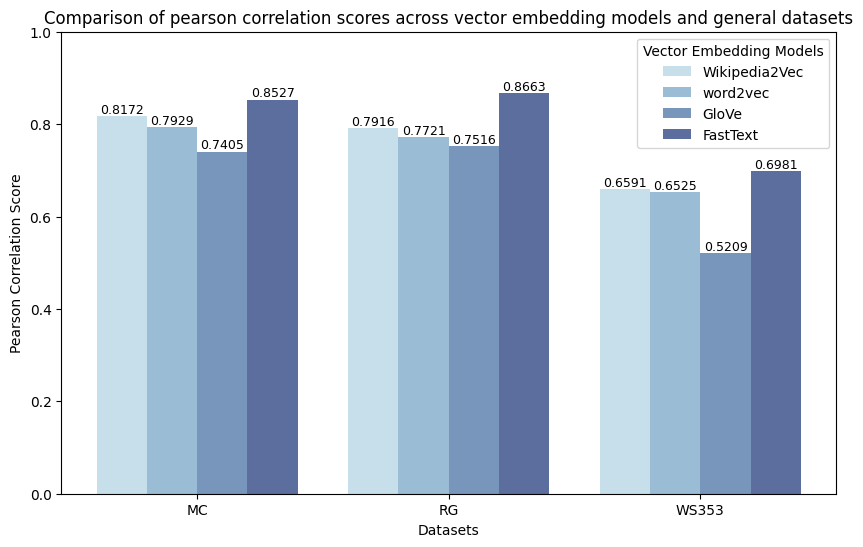

In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# set color palette using seaborn
# sns.set_palette("mako")
sns.set_palette("ch:start=.1,rot=-.2")

# set configurations
x = np.arange(len(corr_df.index))

# initialize 
fig, ax = plt.subplots(figsize=(10, 6))

# plot each model as a group of bars
for i, (model,color) in enumerate(zip(corr_df.columns, sns.color_palette())):
    bars = ax.bar(x + i*0.2, corr_df[model], width=0.2, label=model, color=color)
    # Add value labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.4f}', ha='center', va='bottom', fontsize=9)

# plot details
ax.set_xlabel('Datasets')
ax.set_ylabel('Pearson Correlation Score')
ax.set_title('Comparison of pearson correlation scores across vector embedding models and general datasets')
ax.set_xticks(x + 0.2 * (len(corr_df.columns) - 1) / 2)
ax.set_xticklabels(corr_df.index)
ax.set_ylim(0, 1)
ax.legend(title="Vector Embedding Models")
plt.show()

- Question 8) Generating a new vector - A convex combination between Wikipedia2Vec vector and FastText vector.

In [ ]:
# pre-trained embedding models for,
# Wikipedia2Vec model - wiki2vec
# FastText model - fasttext_model

In [ ]:
def compute_convex_vector(word1, word2, alpha):
    # Get the embeddings
    wiki2vec1 = wiki2vec.get_word_vector(word1)
    wiki2vec2 = wiki2vec.get_word_vector(word2)
    ftvec1 = fasttext_model[word1]
    ftvec2 = fasttext_model[word2]
    
    # computing the convex combinations to generate a new vector
    newvec1 = alpha * wiki2vec1 + (1 - alpha) * ftvec1
    newvec2 = alpha * wiki2vec2 + (1 - alpha) * ftvec2
    
    return newvec1, newvec2

In [ ]:
from scipy.stats import pearsonr

# function to compute the convex combination vector
def compute_convex_model_scores(data, alpha):
    convex_model_scores = []
    
    # loop through the word pairs in each dataset
    for _,row in data.iterrows():

        word1, word2 = row['word1'], row['word2']
        
        # call function to generate new vectors
        new_vec1, new_vec2 = compute_convex_vector(word1.lower(), word2.lower(), alpha)
        
        # calculate the cosine similarity
        sim_score = 1 - cosine(new_vec1, new_vec2)

        # append both human scores and model simularity scores as a tuple for later correlation comparison
        convex_model_scores.append(sim_score)

    return convex_model_scores

In [ ]:
from scipy.stats import pearsonr

# correlation computation function
def compute_correlation(human_scores, model_scores):
    
    # filter the scores of both human judgment and model output similarity scores
    filtered_scores = [(human, model) for human, model in zip(human_scores, model_scores)]
    if len(filtered_scores) > 0:
        human, model = zip(*filtered_scores)
        return pearsonr(human, model)[0]
    return None

In [122]:
# generate a range of factor values (alpha) with a step sixe of 0.1, range 0 - 1
alpha_values = np.linspace(0, 1, num=11)

# initialize a vector to hold the results
results_corr_convex = {}

# loop through each alpha value
for alpha in alpha_values:

    # calculate the convex combination model scores for each dataset
    mc_convex_results = compute_convex_model_scores(mc_df, alpha)
    rg_convex_results = compute_convex_model_scores(rg_df, alpha)
    ws353_convex_results = compute_convex_model_scores(ws353_df, alpha)

    #print the outputs
    # print(mc_convex_results)
    # print(rg_convex_results)
    # print(ws353_convex_results)

    # normalize the similarity scores to match each dataset human judgment score range
    mc_convex_normalized_results = normalize_scores(mc_convex_results, 0, 4)
    rg_convex_normalized_results = normalize_scores(rg_convex_results, 0, 4)
    ws353_convex_normalized_results = normalize_scores(ws353_convex_results, 0, 10)
    
    results_corr_convex[alpha] = {
        'MC': compute_correlation(mc_df['score'], mc_convex_normalized_results),
        'RG': compute_correlation(rg_df['score'], rg_convex_normalized_results),
        'WS353': compute_correlation(ws353_df['score'], ws353_convex_normalized_results),
    }

print(results_corr_convex)


{0.0: {'MC': 0.8527446370208753, 'RG': 0.8662923573916699, 'WS353': 0.6994961710462566}, 0.1: {'MC': 0.856075955500411, 'RG': 0.8657216040961359, 'WS353': 0.7002146273880554}, 0.2: {'MC': 0.8448274671209435, 'RG': 0.850174335642585, 'WS353': 0.6881539725566996}, 0.30000000000000004: {'MC': 0.8287748695199255, 'RG': 0.8297180599879432, 'WS353': 0.6766119050070392}, 0.4: {'MC': 0.8180803336933105, 'RG': 0.8134329664738926, 'WS353': 0.6687090644128273}, 0.5: {'MC': 0.8135708101213357, 'RG': 0.8034355145173655, 'WS353': 0.6641339140585902}, 0.6000000000000001: {'MC': 0.8126117213050542, 'RG': 0.7978348946249425, 'WS353': 0.6616373645639377}, 0.7000000000000001: {'MC': 0.8132398242790935, 'RG': 0.7947532814341864, 'WS353': 0.660297614588657}, 0.8: {'MC': 0.8144677597993579, 'RG': 0.7930567157686609, 'WS353': 0.6595903567502682}, 0.9: {'MC': 0.8158548540872776, 'RG': 0.7921287471800924, 'WS353': 0.6592335239111667}, 1.0: {'MC': 0.8172162439091432, 'RG': 0.7916370701266602, 'WS353': 0.6590746

In [123]:
# convert to a DataFrame for tabulating the results
corr_df_new = pd.DataFrame(results_corr_convex).T
print(corr_df_new)

           MC        RG     WS353
0.0  0.852745  0.866292  0.699496
0.1  0.856076  0.865722  0.700215
0.2  0.844827  0.850174  0.688154
0.3  0.828775  0.829718  0.676612
0.4  0.818080  0.813433  0.668709
0.5  0.813571  0.803436  0.664134
0.6  0.812612  0.797835  0.661637
0.7  0.813240  0.794753  0.660298
0.8  0.814468  0.793057  0.659590
0.9  0.815855  0.792129  0.659234
1.0  0.817216  0.791637  0.659075


In [ ]:
# output of previous correlation results from standalone models
print(corr_df)

       Wikipedia2Vec  word2vec     GloVe  FastText
MC          0.817216  0.792852  0.740547  0.852745
RG          0.791637  0.772062  0.751622  0.866292
WS353       0.659075  0.652535  0.520931  0.698066


In [125]:
# combining the convex combination factor based models correlation results with previous results
for alpha, values in results_corr_convex.items():
    # create a new model name based on factor(alpha) value
    convex_key = f"convexVec_alpha{alpha:.1f}"
    # add the scores with each model for the relevant dataset
    for model, score in values.items():
        corr_results[model][convex_key] = score

# Print the updated dictionary
print(corr_results)

{'MC': {'Wikipedia2Vec': 0.8172162439091432, 'word2vec': 0.792851878067315, 'GloVe': 0.7405472324944988, 'FastText': 0.8527446370208753, 'convexVec_alpha0.0': 0.8527446370208753, 'convexVec_alpha0.1': 0.856075955500411, 'convexVec_alpha0.2': 0.8448274671209435, 'convexVec_alpha0.3': 0.8287748695199255, 'convexVec_alpha0.4': 0.8180803336933105, 'convexVec_alpha0.5': 0.8135708101213357, 'convexVec_alpha0.6': 0.8126117213050542, 'convexVec_alpha0.7': 0.8132398242790935, 'convexVec_alpha0.8': 0.8144677597993579, 'convexVec_alpha0.9': 0.8158548540872776, 'convexVec_alpha1.0': 0.8172162439091432}, 'RG': {'Wikipedia2Vec': 0.7916370701266602, 'word2vec': 0.7720616049320058, 'GloVe': 0.7516215829234909, 'FastText': 0.8662923573916699, 'convexVec_alpha0.0': 0.8662923573916699, 'convexVec_alpha0.1': 0.8657216040961359, 'convexVec_alpha0.2': 0.850174335642585, 'convexVec_alpha0.3': 0.8297180599879432, 'convexVec_alpha0.4': 0.8134329664738926, 'convexVec_alpha0.5': 0.8034355145173655, 'convexVec_al

In [126]:
# convert to a DataFrame for tabulating the results
combined_df = pd.DataFrame(corr_results).T
print(combined_df)

       Wikipedia2Vec  word2vec     GloVe  FastText  convexVec_alpha0.0  \
MC          0.817216  0.792852  0.740547  0.852745            0.852745   
RG          0.791637  0.772062  0.751622  0.866292            0.866292   
WS353       0.659075  0.652535  0.520931  0.698066            0.699496   

       convexVec_alpha0.1  convexVec_alpha0.2  convexVec_alpha0.3  \
MC               0.856076            0.844827            0.828775   
RG               0.865722            0.850174            0.829718   
WS353            0.700215            0.688154            0.676612   

       convexVec_alpha0.4  convexVec_alpha0.5  convexVec_alpha0.6  \
MC               0.818080            0.813571            0.812612   
RG               0.813433            0.803436            0.797835   
WS353            0.668709            0.664134            0.661637   

       convexVec_alpha0.7  convexVec_alpha0.8  convexVec_alpha0.9  \
MC               0.813240            0.814468            0.815855   
RG         

In [127]:
# filtered required columns for visualization with previous model findings. Extract the alpha=0.5 model as an addition
filtered_df = combined_df[['Wikipedia2Vec', 'convexVec_alpha0.5', 'word2vec', 'GloVe', 'FastText']]

print(filtered_df)

       Wikipedia2Vec  convexVec_alpha0.5  word2vec     GloVe  FastText
MC          0.817216            0.813571  0.792852  0.740547  0.852745
RG          0.791637            0.803436  0.772062  0.751622  0.866292
WS353       0.659075            0.664134  0.652535  0.520931  0.698066


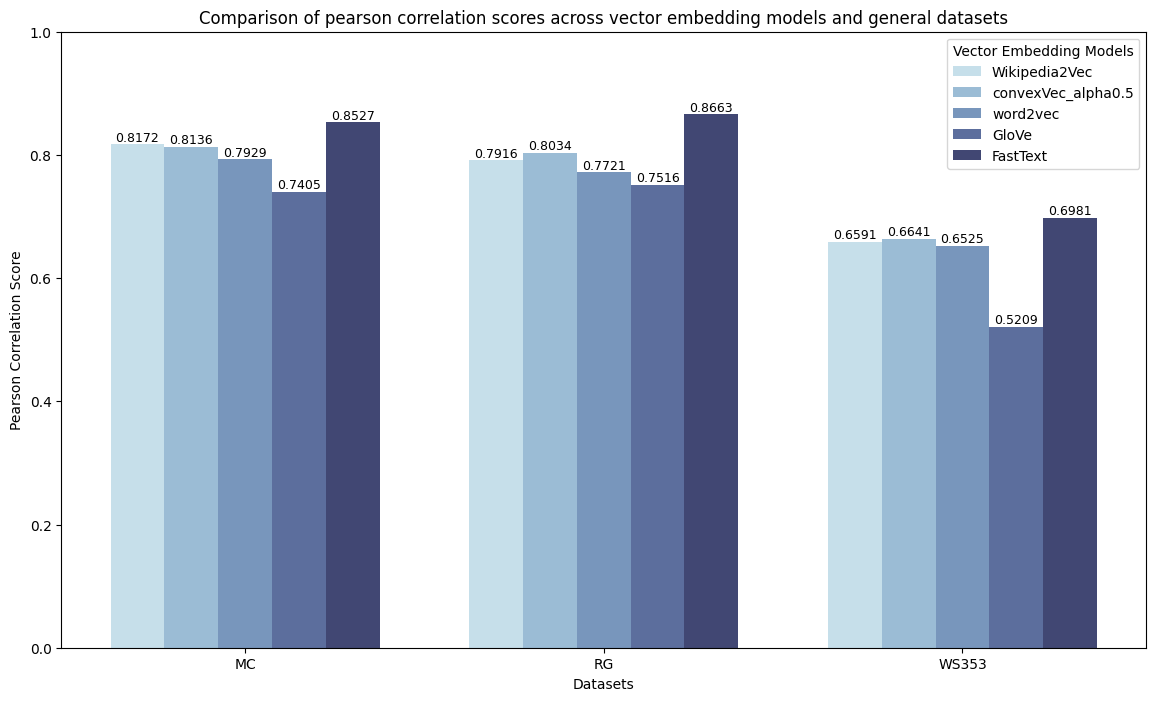

In [ ]:
# visualize the results with the ConvexVec (factor=0.5) model performance with previous models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# set color palette using seaborn
# sns.set_palette("mako")
sns.set_palette("ch:start=.1,rot=-.2")

# set configurations
x = np.arange(len(corr_df.index))

# initialize the figure
fig, ax = plt.subplots(figsize=(14, 8))

# plot each model correlation results as bar charts grouped by dataset
for i, (model,color) in enumerate(zip(filtered_df.columns, sns.color_palette())):
    bars = ax.bar(x + i*0.15, filtered_df[model], width=0.15, label=model, color=color)
    # add maximum value labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.4f}', ha='center', va='bottom', fontsize=9)

# plot details
ax.set_xlabel('Datasets')
ax.set_ylabel('Pearson Correlation Score')
ax.set_title('Comparison of pearson correlation scores across vector embedding models and general datasets')
ax.set_xticks(x + 0.15 * (len(filtered_df.columns) - 1) / 2)
ax.set_xticklabels(filtered_df.index)
ax.set_ylim(0, 1)
ax.legend(title="Vector Embedding Models")
plt.show()

In [ ]:
# next step: visualize for all the convex combinations factors

# filter required models
filtered_df_selected = combined_df[['Wikipedia2Vec', 'convexVec_alpha1.0', 'convexVec_alpha0.9', 'convexVec_alpha0.8', 'convexVec_alpha0.7', 'convexVec_alpha0.6', 'convexVec_alpha0.5', 'convexVec_alpha0.4', 'convexVec_alpha0.3', 'convexVec_alpha0.2', 'convexVec_alpha0.1', 'convexVec_alpha0.0', 'FastText']]


C:\Users\User\AppData\Local\Temp\ipykernel_19408\3280148230.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')
C:\Users\User\AppData\Local\Temp\ipykernel_19408\3280148230.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')
C:\Users\User\AppData\Local\Temp\ipykernel_19408\3280148230.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')


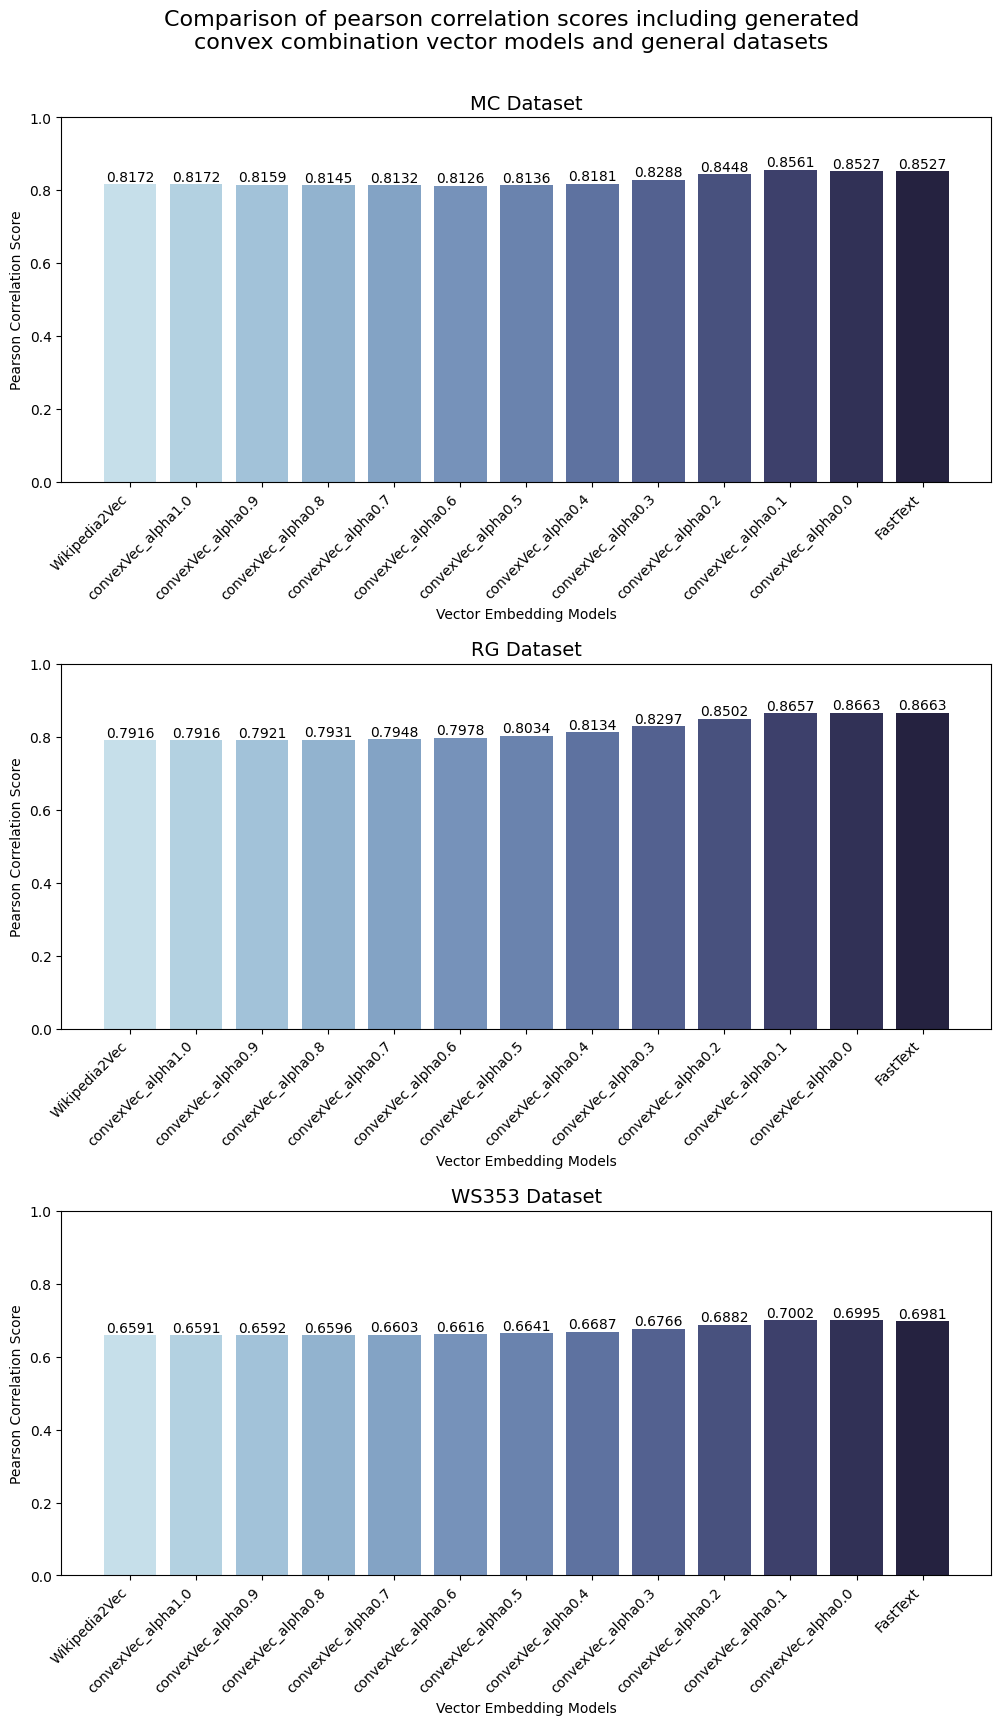

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# set color palette using seaborn
#sns.set_palette('mako')
gradual_palette = sns.color_palette("ch:start=.1,rot=-.2", len(filtered_df_selected.columns))
#sns.set_palette("ch:start=.1,rot=-.2")
#sns.set_palette("#69d")

# initialize a (3,1) subplot for the three datasets
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharey=True)
fig.suptitle('Comparison of pearson correlation scores including generated\nconvex combination vector models and general datasets', fontsize=16)

# iterate over each dataset (MC, RG, WS353) and its corresponding subplot
for idx, data in enumerate(filtered_df_selected.index):
    ax = axes[idx]
    
    # extract the correlation scores for each model in the current dataset
    models = filtered_df_selected.columns
    correlation_values = filtered_df_selected.loc[data]
    
    # plot the bar chart with gradually increasing colors
    for i, (model, value) in enumerate(zip(models, correlation_values)):
        ax.bar(model, value, color=gradual_palette[i])
        
        # add maximum value labels on top of each bar
        ax.text(i, value, f'{value:.4f}', ha='center', va='bottom', fontsize=10)
    
    # plot details
    ax.set_title(f'{data} Dataset', fontsize=14)
    ax.set_xlabel('Vector Embedding Models')
    ax.set_ylabel('Pearson Correlation Score')
    ax.set_ylim(0, 1)

    ax.set_xticklabels(models, rotation=45, ha='right')

# adjust layout for spacing issues
plt.subplots_adjust(top=0.92, hspace=0.5)
plt.show()

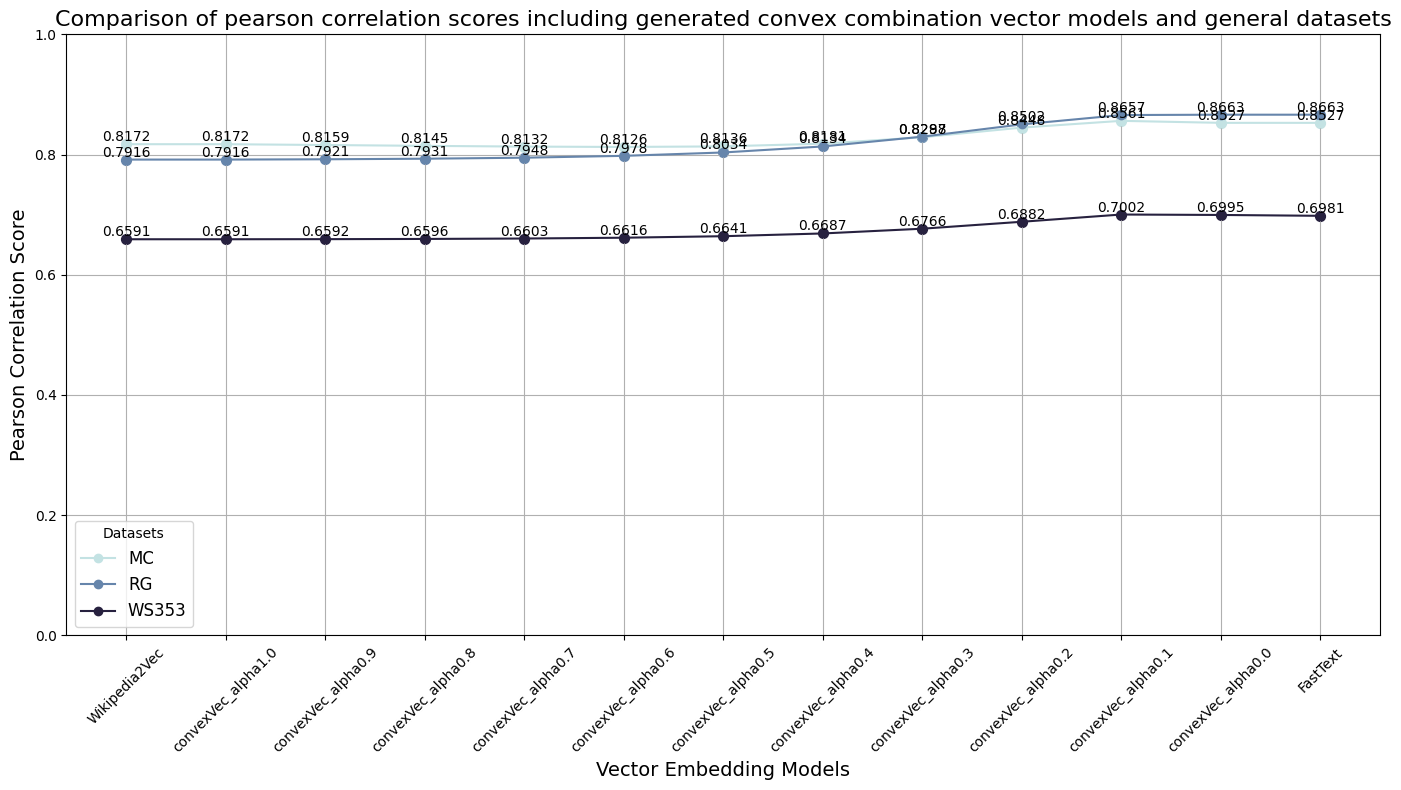

In [133]:
# better visualization of the comparative results across all 3 datasets for all the models can been shown in a single line chart
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set color palette using seaborn
# use 3 color palettes for datasets
colors = sns.color_palette("ch:start=.2,rot=-.3", 3)

# initialize the figure
plt.figure(figsize=(14, 8))

# iterate for each model
models = filtered_df_selected.columns
x = np.arange(len(models))

# plot each dataset line plot
for idx, dataset in enumerate(filtered_df_selected.index):
    correlation_scores = filtered_df_selected.loc[dataset]

    plt.plot(x, correlation_scores, marker='o', label=dataset, color=colors[idx], linewidth=1.5)

    # add markers for correlation scores with their scores on top
    for i, value in enumerate(correlation_scores):
        plt.scatter(i, value, color=colors[idx], s=50)
        plt.text(i, value, f'{value:.4f}', ha='center', va='bottom', fontsize=10)

# plot details
plt.title('Comparison of pearson correlation scores including generated convex combination vector models and general datasets', fontsize=16)
plt.xlabel('Vector Embedding Models', fontsize=14)
plt.ylabel('Pearson Correlation Score', fontsize=14)
plt.xticks(x, models, rotation=45)
plt.ylim(0, 1)

plt.legend(title='Datasets', fontsize=12)
plt.grid()

# adjust layout for spacing issues
plt.tight_layout()
plt.show()
